<a href="https://colab.research.google.com/github/bogsin/Section2_project/blob/main/AI_14_%EA%B9%80%EB%8C%80%EC%98%81_section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from sklearn import preprocessing
import pandas as pd
from numpy import *
import os
from matplotlib.pyplot import show
from seaborn import countplot
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')



df = pd.read_csv('/content/drive/My Drive/Video_games_esrb_rating.csv',sep=",",encoding="ISO-8859-1",header=0)

In [ ]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139â¦,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [ ]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_language', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

In [ ]:
df = df.rename(columns={"strong_janguage": "strong_language"})

In [ ]:
df.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_language              int64
strong_sexual_conten

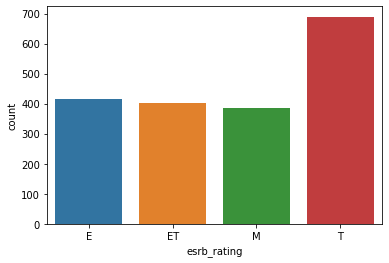

In [ ]:
countplot(df['esrb_rating'])
show()

타겟 시각화

In [ ]:
X = df.drop(['title', 'esrb_rating'], axis = 1)
y = df['esrb_rating']

In [ ]:
y.unique()

array(['E', 'ET', 'M', 'T'], dtype=object)

In [ ]:
col_val = pd.DataFrame()
col_val = df.drop(["title", "esrb_rating"], axis=1)

In [ ]:
unique_val = np.unique(col_val)
unique_val

array([0, 1])

In [ ]:
del col_val, unique_val

In [ ]:
df["title"].is_unique

True

In [ ]:
df_vis_x = df.drop("esrb_rating",axis = 1)
df_vis_x.set_index("title", inplace=True)
df_vis_y = df["esrb_rating"]

scaler = StandardScaler()

In [ ]:
df_vis_scaled_x = scaler.fit_transform(df_vis_x)

In [ ]:
df_vis_scaled_x

array([[ 1.05034216, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554],
       [ 1.05034216, -0.22973415,  9.93664139, ..., -0.12682977,
        -0.12682977, -0.26116554],
       [ 1.05034216, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554],
       ...,
       [-0.95207071, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554],
       [-0.95207071, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554],
       [ 1.05034216, -0.22973415, -0.10063763, ..., -0.12682977,
        -0.12682977, -0.26116554]])

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principal_components = pca.fit_transform(df_vis_scaled_x)

In [ ]:
principaldf = pd.DataFrame(data = principal_components,
                           columns = ["pc1", "pc2"])

In [ ]:
principaldf

,pc1,pc2
0,-1.049086,0.456309
1,0.826040,3.511673
2,1.262093,-1.971510
3,-1.217103,-1.402516
4,-0.829240,-1.732662
...,...,...
1890,2.114460,-3.092212
1891,-0.873794,-1.176650
1892,-1.223855,0.210264
1893,-0.204084,-0.783398


In [ ]:
finaldf = pd.concat([principaldf, df_vis_y], axis = 1)

In [ ]:
finaldf

,pc1,pc2,esrb_rating
0,-1.049086,0.456309,E
1,0.826040,3.511673,ET
2,1.262093,-1.971510,M
3,-1.217103,-1.402516,ET
4,-0.829240,-1.732662,T
...,...,...,...
1890,2.114460,-3.092212,M
1891,-0.873794,-1.176650,T
1892,-1.223855,0.210264,E
1893,-0.204084,-0.783398,T


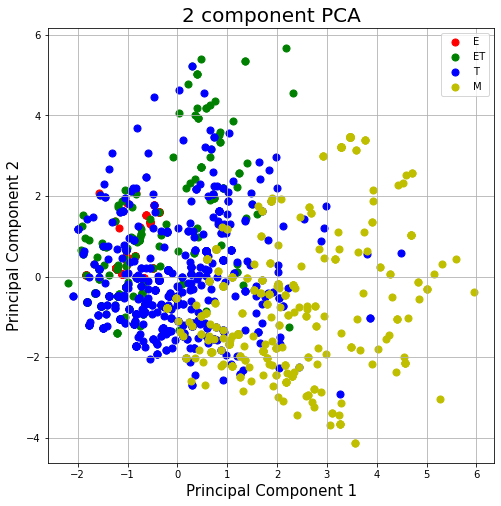

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1", fontsize = 15)
ax.set_ylabel("Principal Component 2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["E", "ET", "T", "M"]
colors = ["r", "g", "b", "y"]
for target, color in zip(targets,colors):
    indicesToKeep = df_vis_y == target
    ax.scatter(finaldf.loc[indicesToKeep, "pc1"]
               , finaldf.loc[indicesToKeep, "pc2"]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
one_hot = pd.get_dummies(df["esrb_rating"])

In [ ]:
df_heat = df.drop("esrb_rating", axis=1)

In [ ]:
df_heat = df_heat.join(one_hot)

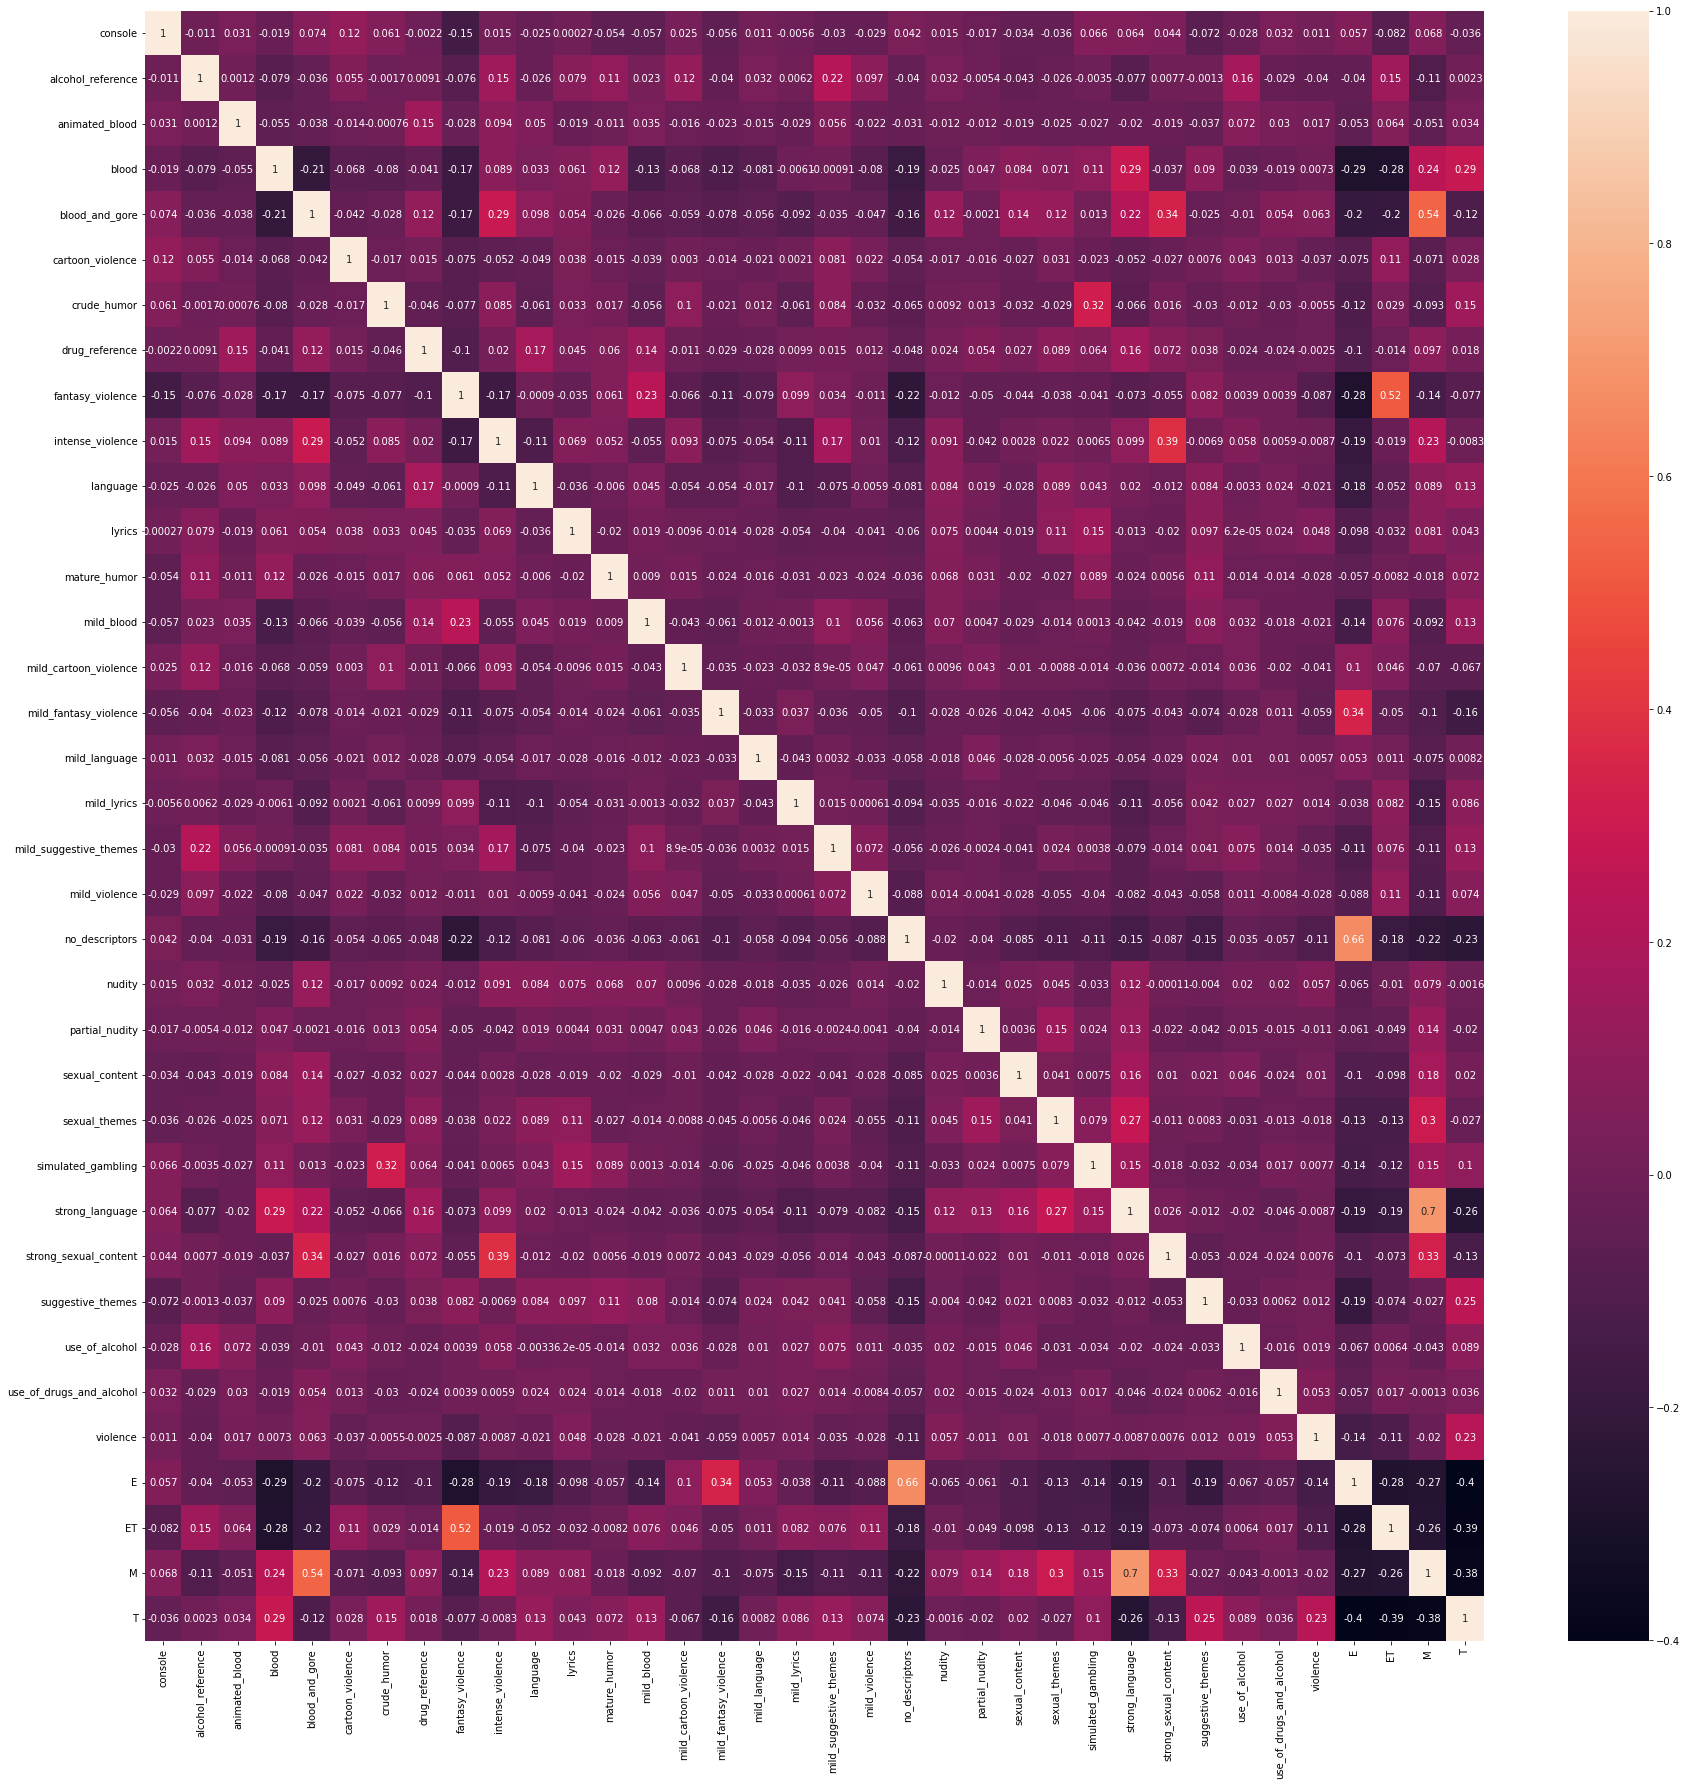

In [ ]:
cor_matrix = df_heat.corr()
ax = plt.subplots(figsize=(30,30))
sns.heatmap(cor_matrix, annot=True);

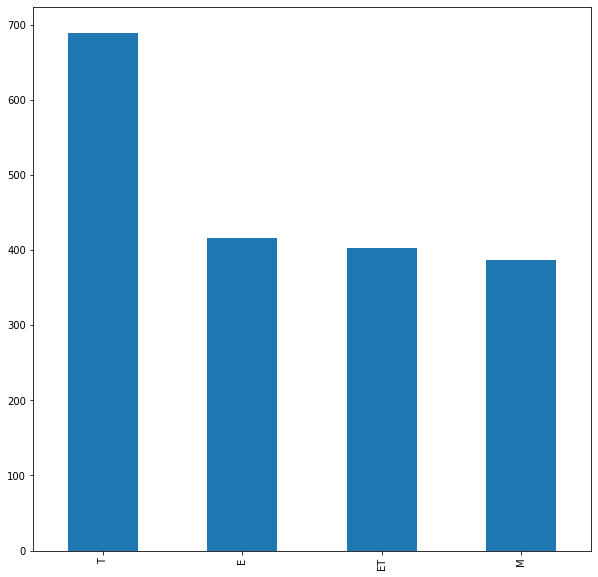

In [ ]:
ax = plt.subplots(figsize=(10,10))
df["esrb_rating"].value_counts().plot.bar();

In [ ]:
df_desc = df.drop(columns=["title", "esrb_rating","console"], axis=1)

In [ ]:
df_desc = df_desc.sum()

In [ ]:
df_desc = df_desc.reset_index() 

In [ ]:
df_desc.rename(columns={"index" : "Descriptors", 0 : "Count"}, inplace=True)

In [ ]:
df_desc.sort_values("Count", ascending=False, inplace=True)

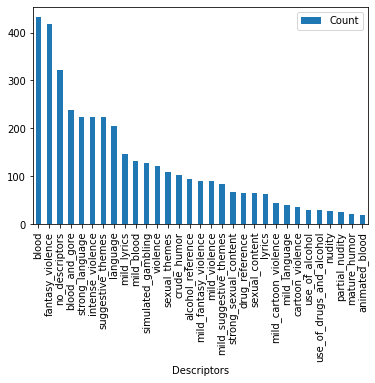

In [ ]:
df_desc.plot.bar(x="Descriptors", y="Count");

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
df_x = df.drop(columns=["esrb_rating","title"], axis=1)
df_y = df["esrb_rating"]
df_test = pd.read_csv('/content/drive/My Drive/test_esrb.csv',sep=",",encoding="ISO-8859-1",header=0)
df_test_x = df_test.drop(columns=["esrb_rating", "title"], axis=1)
df_test_y = df_test["esrb_rating"]

In [ ]:
clf.fit(df_x, df_y)

DecisionTreeClassifier()

In [ ]:
clf.score(df_test_x, df_test_y)

0.838

In [ ]:
cross_val_score(clf, df_x, df_y, cv=10)

array([0.77894737, 0.81052632, 0.85789474, 0.9       , 0.81578947,
       0.87301587, 0.87301587, 0.87301587, 0.88888889, 0.86243386])

In [ ]:
preds = clf.predict(df_test_x)

In [ ]:
print(classification_report(df_test_y, preds))

              precision    recall  f1-score   support

           E       0.94      0.95      0.95       100
          ET       0.80      0.88      0.84       126
           M       0.85      0.70      0.77        90
           T       0.81      0.82      0.81       184

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [ ]:
labels = ["M", "T", "ET", "E"]

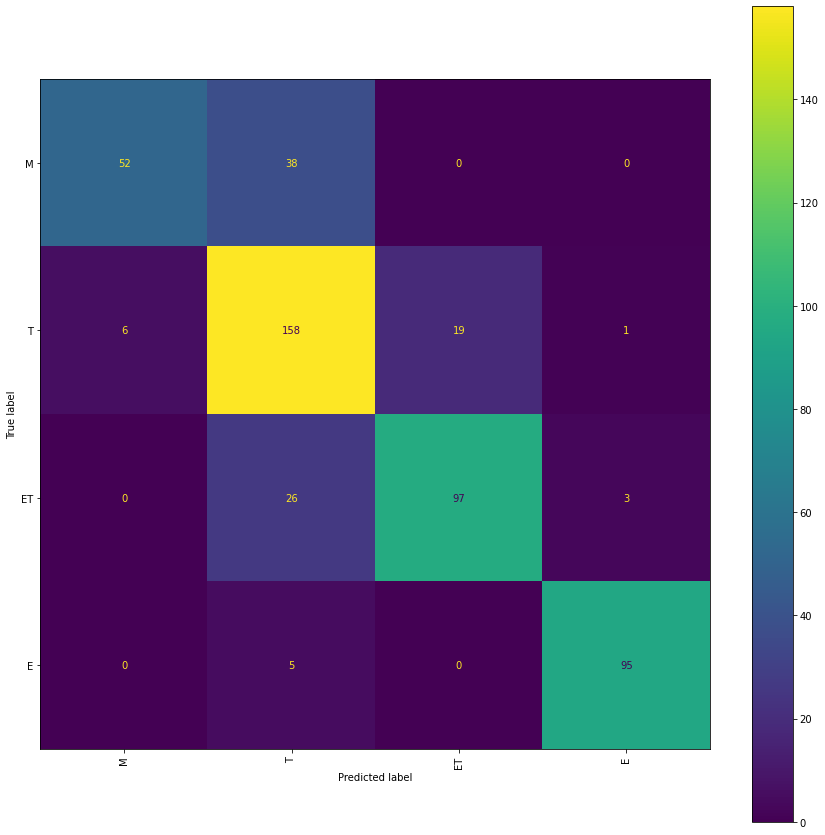

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
metrics.plot_confusion_matrix(clf, df_test_x,df_test_y, labels=labels, xticks_rotation="vertical", ax=ax)

In [ ]:
clf2 = DecisionTreeClassifier(criterion="entropy")

In [ ]:
clf2.fit(df_x, df_y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
clf2.score(df_test_x, df_test_y)

0.85

In [ ]:
cross_val_score(clf2, df_x, df_y, cv=10)

array([0.77368421, 0.81578947, 0.85789474, 0.9       , 0.82105263,
       0.87301587, 0.86772487, 0.86772487, 0.88359788, 0.86772487])

In [ ]:
preds2 = clf2.predict(df_test_x)

In [ ]:
print(classification_report(df_test_y, preds2))

              precision    recall  f1-score   support

           E       0.94      0.95      0.95       100
          ET       0.83      0.89      0.86       126
           M       0.85      0.73      0.79        90
           T       0.82      0.83      0.82       184

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



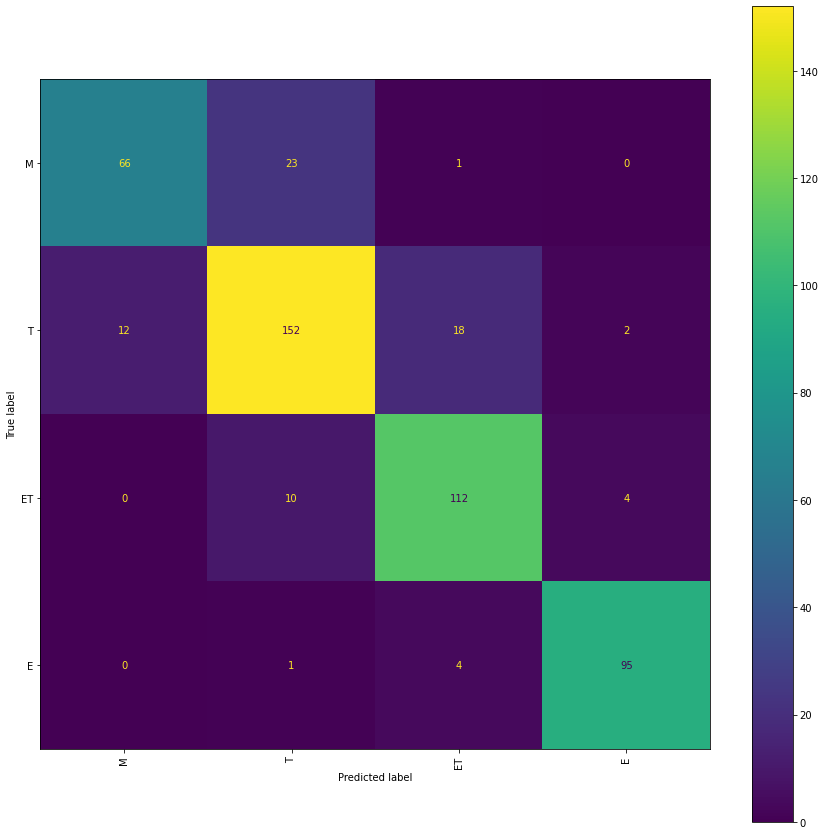

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
metrics.plot_confusion_matrix(clf2, df_test_x,df_test_y, labels=labels, xticks_rotation="vertical", ax=ax)